Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

Pergunta: Dados dos requisitantes, tipos de uso - associação com linhagens e demanda e tipos de ensaios. 
Necessário ter todas essas linhagens? -  Alessandra Aguiar.

Tipo de uso: Não temos informações sobre os Usuários Externos para qual tipo de uso, é realizada apenas a produção dos animais. Já os usuários internos da pra saber, porém, não pelo software BioterC

Quais são os pedidos externos e linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para cada linhagem?

Quais são os pedidos internos e as linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para linhagem?

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [43]:
#Dataframe contendo as informações referentes a pedidos

pedido = pd.read_csv('../../tabelas_test/pedido_2019-06-18.csv', index_col='id')
pedido.head()

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,1421625600,1411391851,666,1411392413
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,1412121600,1411583300,1412619416,1418727743
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,1420070400,1411491911,666,1411491957
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,1412899200,1411579273,1412620096,1422037389
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,1412121600,1411583355,1412082161,1418727745


In [44]:
#Verificando a quantidade de animais solicitados de usuários internos.

pedi_soma_int = pedido[pedido['lab'] != 'Usuário Externo']['num_ani'].sum()
print(f'{pedi_soma_int}: animais solicitados internamente')

1608: animais solicitados internamente


In [45]:
#verificando a quantidade de entradas para cada linhagem

pedido['ling'].value_counts()

Balb/c       215
Swiss         82
C57BL/6       37
S129KO        21
C57BL06WT     15
Swiss-2        9
S129WT         6
Swiss-1        3
AG129          2
C3H            2
DBA/1J         1
Name: ling, dtype: int64

COMEÇA AQUI

In [46]:
#Criando uma variável para receber o filtro só de usuários internos
pedidos_int = pedido[pedido['lab'] != 'Usuário Externo']
pedidos_int.head()

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Transformando todas as datas

datas = ['data_inicio', 'data_solic', 'data_forn', 'data_fim']

for d in datas:
    pedidos_int[d] = pd.to_datetime(pedidos_int[d], unit = 's') #indica o formato das datas
    
pedidos_int.head()
#pedidos_int[pedidos_int['ling'] == 'C3H']
pedidos_int[pedidos_int['ling'] == 'DBA/1J']

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
392,Pryscilla Wowk,pryscilla@wowk.com.br,IBMP,-,DBA/1J,10,dia,1,1,LW-4/19,490,1950101194,4-27<br />4-26,11010112,1-11<br />1-12,2019-05-02 03:00:00,2019-05-02 15:00:04,2019-05-02 15:01:39,2019-05-22 19:13:48


In [47]:
pedidos_int['ling'].value_counts()

Balb/c     130
Swiss       50
Swiss-2      9
S129KO       7
Swiss-1      3
C57BL/6      3
AG129        2
DBA/1J       1
Name: ling, dtype: int64

In [48]:
pedidos_int['ling'].replace(['Swiss-1', 'Swiss-2'],'Swiss' ,inplace=True)
pedidos_int['ling'].value_counts()

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Balb/c     130
Swiss       62
S129KO       7
C57BL/6      3
AG129        2
DBA/1J       1
Name: ling, dtype: int64

In [49]:
ped_heter_int = pedidos_int[pedidos_int['ling'] == 'Swiss']['num_ani'].sum()
print(f'{ped_heter_int}: total de animais heterogênicos solicitações internas')

368: total de animais heterogênicos solicitações internas


In [50]:
inte = pedidos_int.groupby('ling')
inte.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
AG129,34,42,2,228,1332,1332
Balb/c,969,1368,605,54492,66588501277,31575777555
C57BL/6,25,29,17,1572,2147484573,1360
DBA/1J,10,1,1,490,1950101194,11010112
S129KO,202,26,7,1957,10737819434,2197494220
Swiss,368,608,216,38437,25745721404,22973109512


In [51]:
ling_mais_soli_ano = ['Balb/c','Swiss','S129KO']

g_ling_mais_ped_in = pedidos_int[pedidos_int['ling'].isin(ling_mais_soli_ano)].groupby('ling')
lin_mais_ped_in = g_ling_mais_ped_in.sum()
lin_mais_ped_in

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
Balb/c,969,1368,605,54492,66588501277,31575777555
S129KO,202,26,7,1957,10737819434,2197494220
Swiss,368,608,216,38437,25745721404,22973109512


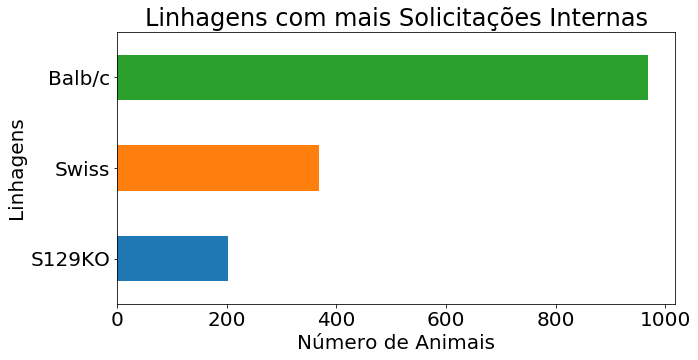

In [52]:
plt.figure(figsize=(10,5))
plt.title('Linhagens com mais Solicitações Internas')

plot = lin_mais_ped_in.groupby('ling')
plot['num_ani'].sum().sort_values(ascending=True).plot(
kind='barh'

)
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/animais_mais_int_I.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [53]:
ling_menos_soli_ano = ['AG129', 'C57BL/6', 'DBA/1J' ]

g_ling_menos_ped_int = pedidos_int[pedidos_int['ling'].isin(ling_menos_soli_ano)].groupby('ling')
lin_menos_ped_int = g_ling_menos_ped_int.sum()
lin_menos_ped_int

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
AG129,34,42,2,228,1332,1332
C57BL/6,25,29,17,1572,2147484573,1360
DBA/1J,10,1,1,490,1950101194,11010112


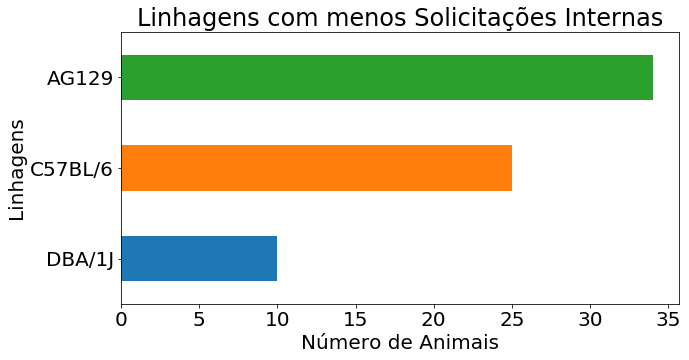

In [54]:
plt.figure(figsize=(10,5))
plt.title('Linhagens com menos Solicitações Internas')

plot = lin_menos_ped_int.groupby('ling')
plot['num_ani'].sum().sort_values(ascending=True).plot(
kind='barh'

)
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/animais_menos_int_I.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

D: Em quanto tempo em media leva para os animais serem fornecidos para os pedidos?
Acho que seria interessante pra controle pro Giovanny. Pro trabalho não tem muito impacto.

APENAS CASO O GIOVANNY QUEIRA

In [55]:
# #Criada um DataFrame com o período entre acasalamento e nascimento - com outliers (datas day_nasc_acas)
# ped_int_periodo = pd.DataFrame()
# ped_int_periodo = pedidos_int[['data_solic', 'data_forn', 'num_ani', 'ling']]
# ped_int_periodo['day_pedido_int'] = list(map(lambda day_pedido: pedidos_int['data_forn'] - pedidos_int['data_solic'], pedidos_int))[0]
# ped_int_periodo.head()

In [56]:
# #retirando os horários da coluna 'day_acas_sex_day'
# p1 = lambda s: int(str(s).split(' ')[0])                    #Criada uma função única para transforar a serie em string, cortar por espaços na [0]
# p2 = ped_int_periodo['day_pedido_int']                             #Chamando essa coluna na minha dataframe
# l = list(map(p1, p2))                                       #Guardando essas informações numa lista/map para iteração e percorrer a serie de uma só vez
# ped_int_periodo['day_pedido_day'] = l                 #Criando nova coluna com apenas o valor dos dias que vai receber o que tenho na minha lista          
# ped_int_periodo.head()

In [57]:
# #Retirando os outliers da coluna day_nasc_acas_day para verificar o período de acasalamento ao nascimento.
# q1 = ped_int_periodo['day_pedido_int'].quantile(0.25) #filtro para a retirada dos valores discrepantes
# q3 = ped_int_periodo['day_pedido_int'].quantile(0.75)
# iqr = q3 - q1

# ped_int_periodo_sout = ped_int_periodo[(ped_int_periodo['day_pedido_int'] > (q1 - 1.5 * iqr)) & 
#                                        (ped_int_periodo['day_pedido_int'] < (q3 + 1.5 * iqr))]#dataframe


In [58]:
# ped_int_periodo_sout = ped_int_periodo_sout[ped_int_periodo_sout['day_pedido_day'] != 0]
# ped_int_periodo_sout.head()

In [59]:
# group = ped_int_periodo_sout.groupby('ling')
# group.mean()

In [60]:
# #Plotando gráfico do período médio de entrega.

# plt.figure(figsize=(15,10))
# plt.title('Mediana do período entre solicitação e entrega')

# plot = ped_int_periodo_sout.groupby('ling')
# plot['day_pedido_day'].median().sort_values(ascending=True).plot(
# kind='barh'
# )
# plt.xlabel('Dias') #definindo nome do eixo X
# plt.ylabel('Linhagens')

Hipótese de que o período de entrega de animais é menor entre Swiss e Balb/c por ter maior disponibilidade ?
E isso é importante saber?

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Gerando série temporal para criar previsão de solicitações para o próximo ano

SÉRIES TEMPORAIS + MODELO PREDITIVO

In [61]:
#Criando Dataframe para serie temporal

pedido_df = pd.DataFrame(pedidos_int['data_solic'])
pedido_df['ling'] = pedidos_int['ling']
pedido_df['lab'] = pedidos_int['lab']
pedido_df['num_ani'] = pedidos_int['num_ani']
pedido_df['data_inicio'] = pedidos_int['data_inicio']
pedido_df['data_forn'] = pedidos_int['data_forn']
pedido_df['data_fim'] = pedidos_int['data_fim']
pedido_df = pedido_df.set_index('data_solic')
pedido_df.head()

,ling,lab,num_ani,data_inicio,data_forn,data_fim
data_solic,,,,,,
2014-09-24 18:28:20,Swiss,LPEP,4,2014-10-01 00:00:00,2014-10-06 18:16:56,2014-12-16 11:02:23
2014-09-24 17:21:13,Swiss,VIROMOL,11,2014-10-10 00:00:00,2014-10-06 18:28:16,2015-01-23 18:23:09
2014-09-24 18:29:15,Balb/c,LPEP,6,2014-10-01 00:00:00,2014-09-30 13:02:41,2014-12-16 11:02:25
2014-09-26 19:56:40,Swiss,LPEP,3,2014-10-24 00:00:00,2014-09-29 19:21:29,2014-12-03 12:23:33
2014-11-25 19:23:08,Swiss,LABREG,2,2014-11-28 05:00:00,2014-12-03 12:14:51,2015-01-23 18:29:01


In [62]:
tempo_mes = pedido_df.resample('M').sum()
tempo_mes.head()

,num_ani
data_solic,
2014-09-30,24
2014-10-31,7
2014-11-30,16
2014-12-31,8
2015-01-31,0


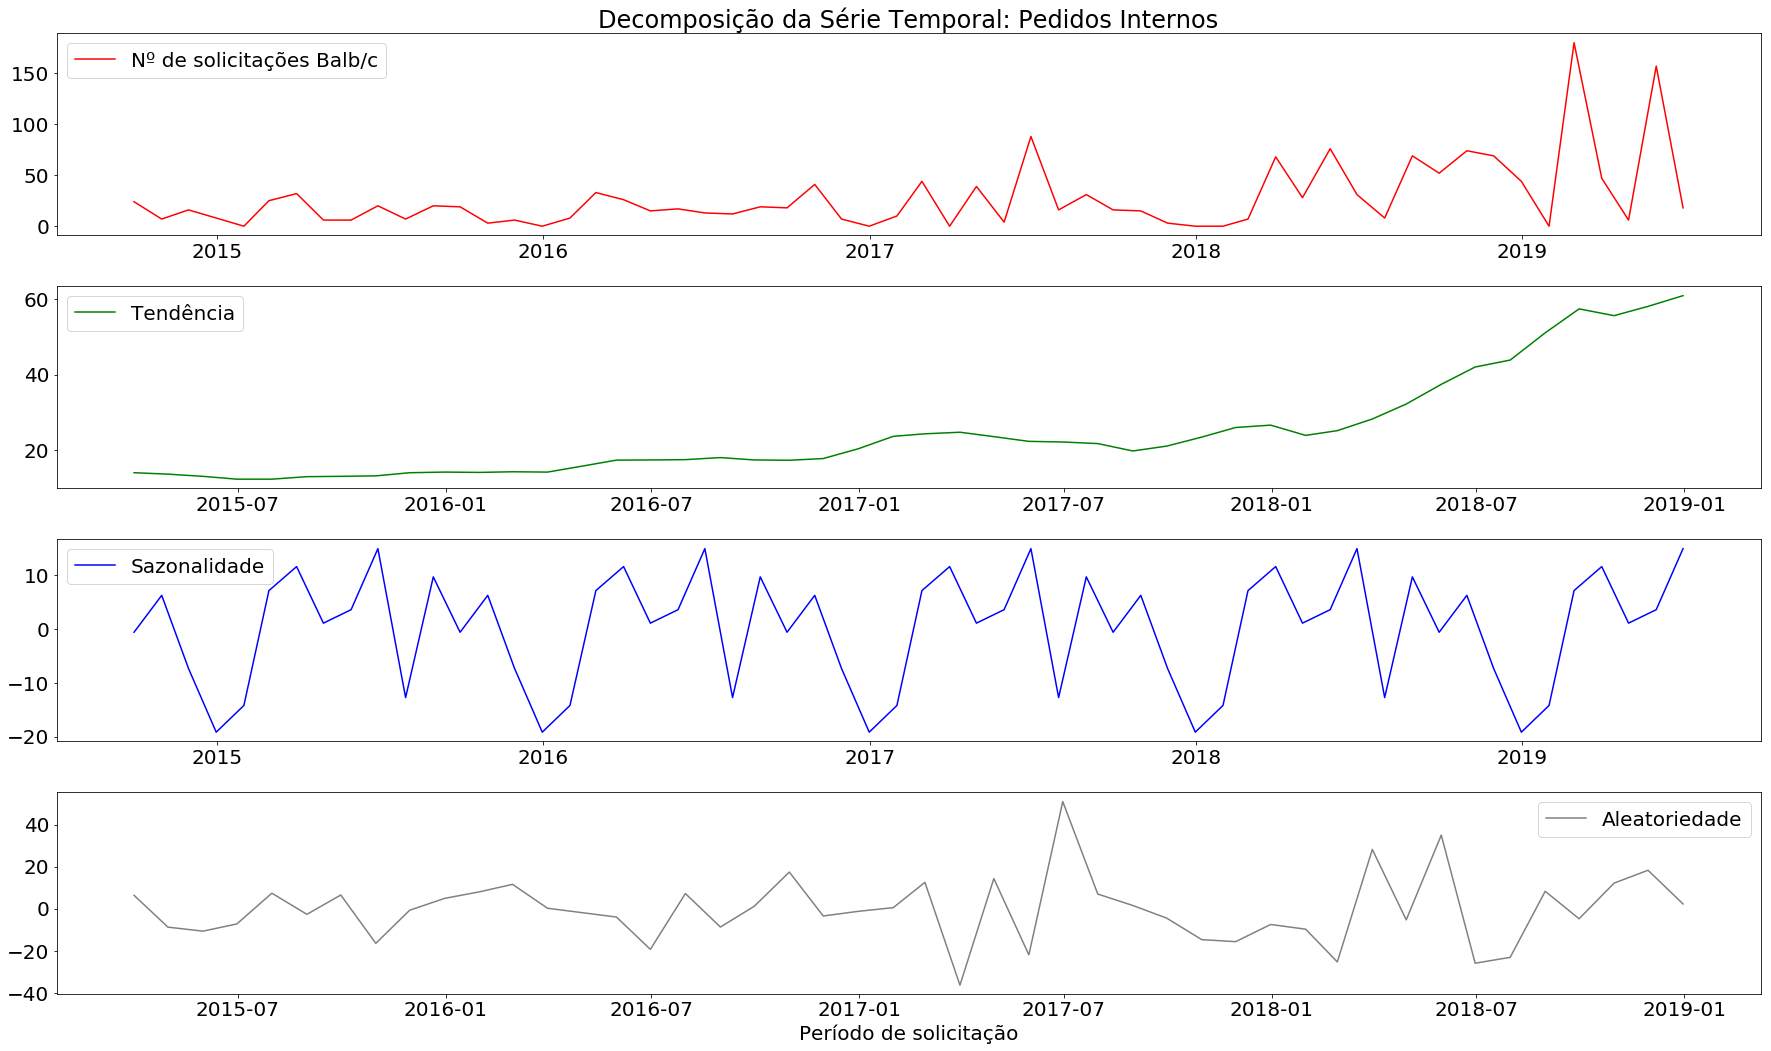

In [63]:
#Gráfico de série temporal por linhagem

serie_ling = pedido_df.resample('M').sum() #somando os meses
decom = seasonal_decompose(serie_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(serie_ling, label = 'Nº de solicitações Balb/c', color='red')
plt.legend(loc = 'best')
plt.title('Decomposição da Série Temporal: Pedidos Internos') 

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Período de solicitação')
plt.tight_layout()


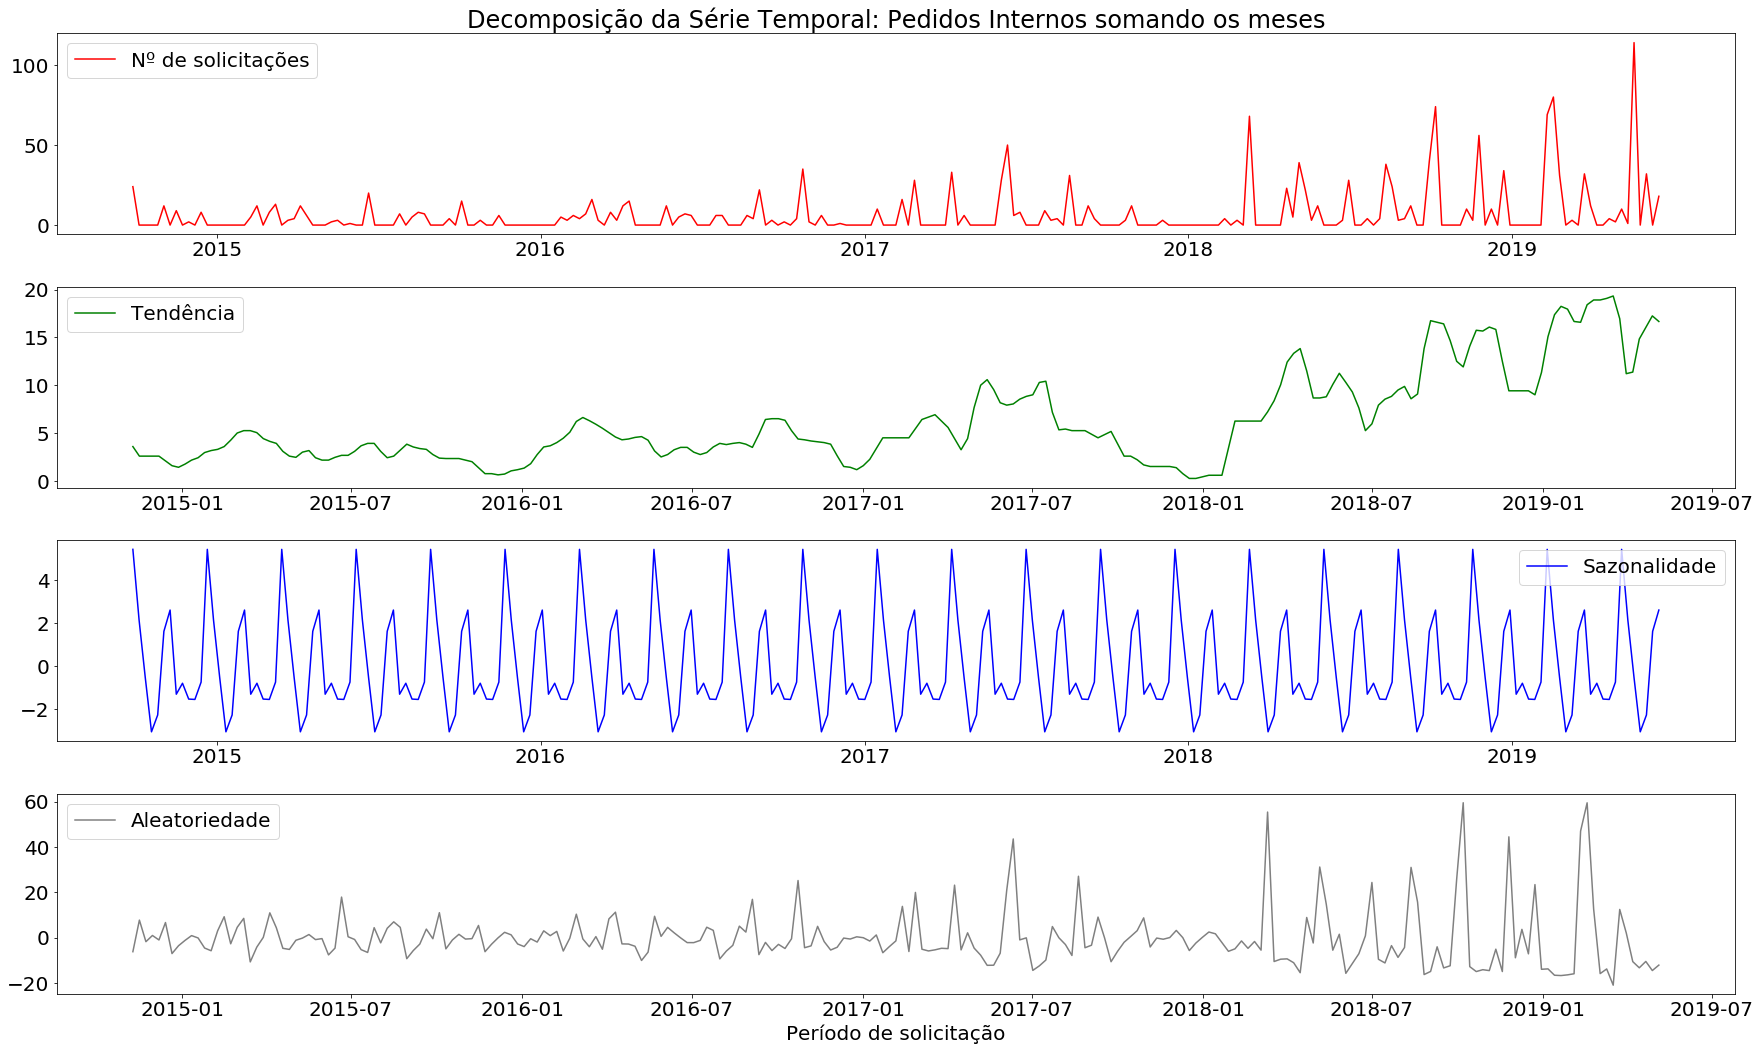

In [64]:
#Gráfico de série temporal por linhagem

serie_ped_inte = pedido_df.resample('W').sum() #somando as semanas
decom = seasonal_decompose(serie_ped_inte, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))

plt.subplot(4, 1, 1)
plt.plot(serie_ped_inte, label = 'Nº de solicitações', color='red')
plt.legend(loc = 'best')
plt.title('Decomposição da Série Temporal: Pedidos Internos somando os meses') 

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Período de solicitação')
plt.tight_layout()


In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
previsao = pedido_df.resample('M').sum()               #somando mês a mês
previsao = previsao['num_ani']                                     #para trabalhar com a previsão deve usar uma série, na qual foi escolhida 'num_ani'
previsao.head()

data_solic
2014-09-30    24
2014-10-31     7
2014-11-30    16
2014-12-31     8
2015-01-31     0
Freq: M, Name: num_ani, dtype: int64

In [67]:
pedido_df.index.max()

Timestamp('2019-06-14 17:47:37')

In [68]:
for p in range(3):                                    #laço com tamanho 3 para p
    for q in range(3):                                #laço com tamanho 3 para q
        for d in range(3):                            #laço com tamanho 3 para d
            test = (p, q, d)                          #guardando p,q,d em uma variável
            modelo = ARIMA(previsao, order=test, freq='M')  #modelo ARIMA
            try:                                      #tente
                results = modelo.fit()                #usando a função fit
                print(f'({p}, {q}, {d})')             #printando os valores ajustados
                print(results.summary())              #resumo dos parâmetros
                print()
            except: 
                print('Não')

/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

(0, 0, 0)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   58
Model:                     ARMA(0, 0)   Log Likelihood                -287.638
Method:                           css   S.D. of innovations             34.479
Date:                Thu, 25 Jun 2020   AIC                            579.277
Time:                        15:20:17   BIC                            583.398
Sample:                    09-30-2014   HQIC                           580.882
                         - 06-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7241      4.527      6.124      0.000      18.851      36.597

(0, 0, 1)
                              ARMA Model Results                              
Dep. Variable:                n

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


Não
(1, 0, 2)
                              ARMA Model Results                              
Dep. Variable:                num_ani   No. Observations:                   58
Model:                     ARMA(1, 2)   Log Likelihood                -280.441
Method:                       css-mle   S.D. of innovations             30.156
Date:                Thu, 25 Jun 2020   AIC                            570.882
Time:                        15:20:21   BIC                            581.185
Sample:                    09-30-2014   HQIC                           574.895
                         - 06-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            33.4017     16.095      2.075      0.043       1.856      64.947
ar.L1.num_ani     0.9533      0.063     15.197      0.000       0.830       1.076
ma.L1.num_ani    -1.1588  

/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
/home/eloiza/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/eloiza/anaconda3/lib/python3.7/site-packages/scipy/stats/_di

In [69]:
teste = ARIMA(previsao, order=(2, 1, 1))                  # dentro de order temos (p, q, d) p n° de termos auto regressivos, q n° da média móvel (muveing average), d n° de diferenças ñ sazonais
modelo_tr = teste.fit()                             #ajusta o modelo ARIMA (p, d, q)
modelo_tr.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.num_ani   No. Observations:                   57
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -274.012
Method:                       css-mle   S.D. of innovations             29.109
Date:                Thu, 25 Jun 2020   AIC                            558.025
Time:                        15:20:24   BIC                            568.240
Sample:                    10-31-2014   HQIC                           561.995
                         - 06-30-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0430      0.660      1.580      0.120      -0.251       2.337
ar.L1.D.num_ani    -0.5582      0.175     -3.195      0.002      -0.901      -0.216
ar.L2.D.num_ani    -0.3428      0.176     -1.943      0.057      -0.689       0.003
ma.L1.D.num_ani    -0.6918      0.169     -4.101      0.000      -1.022      -0.361
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8141           -1.5013j            1.7079           -0.3291
AR.2           -0.8141           +1.5013j            1.7079            0.3291
MA.1            1.4454           +0.0000j            1.4454            0.0000
-----------------------------------------------------------------------------
"""

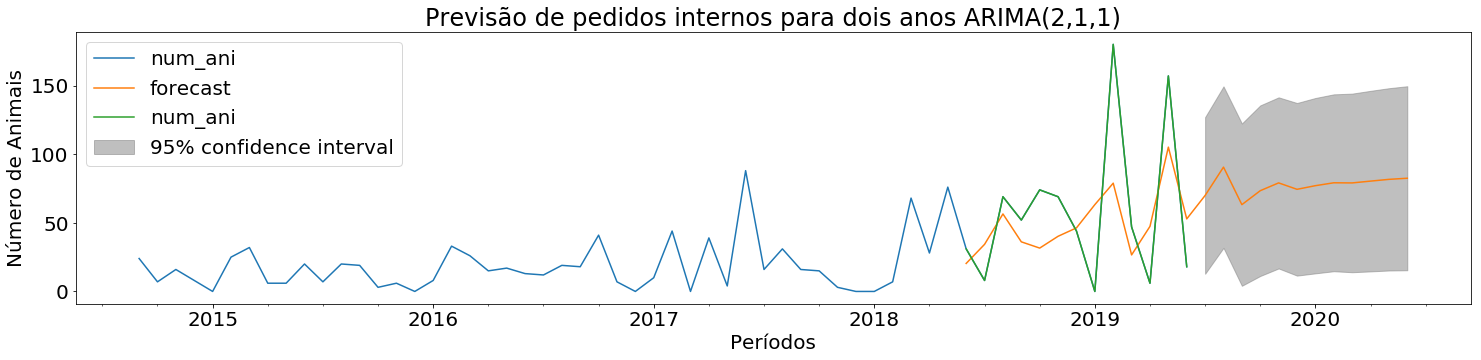

In [71]:
#previsão somando todas as linhagens mês a mês

prev = modelo_tr.forecast(steps=12)                                            #que irá te retornar a previsão para o período definido, que pode ser dias, meses, anos,
plt.figure(figsize=(25, 5))
modelo_tr.plot_predict('2018-06', '2020-06',                                   #decedindo o período de previsão
                       ax = previsao.plot(),
                       plot_insample=True
                      )
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.title('Previsão de pedidos internos para dois anos ARIMA(2,1,1)')

plt.xlabel('Períodos') #definindo nome do eixo X
plt.ylabel('Número de Animais') #definindo nome do eixo Y
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Salvando os gráficos
plt.savefig(
    fname="../../resultados/previsao_sol_inte.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [72]:
inic = pedidos_int.loc[pedidos_int.index.min(), 'data_solic'] #loc: localizador - localizando a primeira data
fim = pedidos_int.loc[pedidos_int.index.max(), 'data_solic']

Gráfico solicitação de animais usuários internos ICC linhagens mais pedidas ano a ano

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

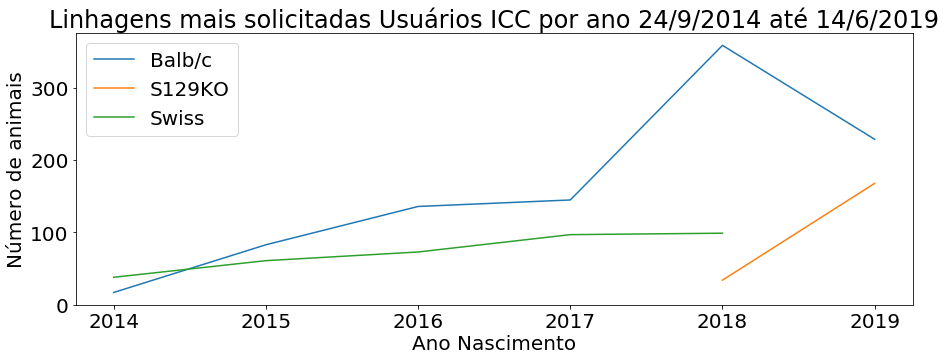

In [73]:
#Gráfico para as linhagens mais solicitadas por ano
ling_mais_soli_ano = ['Balb/c','S129KO','Swiss']

plt.figure(figsize=(15, 5))
for l in ling_mais_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando legendas do gráfico

plt.title(f'Linhagens mais solicitadas Usuários ICC por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_mais_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Número de animais')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/solic_usuariointerno_mais_ano_I.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários internos ICC linhagens mais pedidas mês a mês

In [74]:
# #Gráfico de solicitações internas por mês
# ling_mais_soli_mes = ['Balb/c','S129KO','Swiss']

# plt.figure(figsize=(15, 5))
# for c in ling_mais_soli_mes:
#     pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando o gráfico
# plt.title(f'Linhagens mais solicitadas Usuários Internos ICC por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
# plt.legend(ling_mais_soli_mes)
# plt.xlabel('Mês Nascimento')
# plt.ylabel('Soma de animais')

# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando o gráfico.
# plt.savefig(
#     fname="../resultados/14_pergunta_solic_usuarioexterno_mais_mes.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

Gráfico solicitação de animais usuários internos ICC linhagens menos pedidas ano a ano

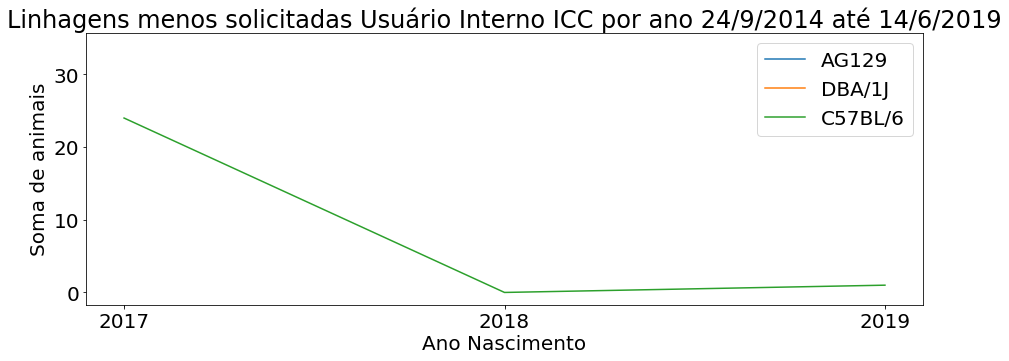

In [75]:
ling_menos_soli_ano = ['AG129', 'DBA/1J', 'C57BL/6' ]

plt.figure(figsize=(15, 5))
for l in ling_menos_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
plt.title(f'Linhagens menos solicitadas Usuário Interno ICC por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_menos_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.savefig(
    fname="../../resultados/solic_usuariointerno_menos_ano_I.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários internos ICC linhagens menos pedidas mês a mês

In [35]:
# ling_menos_soli_mes = ['AG129', 'DBA/1J', 'C57BL/6']

# plt.figure(figsize=(15, 5))
# for c in ling_menos_soli_mes:
#     pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()
    
# plt.title(f'Linhagens menos solicitadas Usuários Internos ICC por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
# plt.legend(ling_menos_soli_mes)
# plt.xlabel('Mês Nascimento')
# plt.ylabel('Soma de animais')
# plt.savefig(
#     fname="../resultados/14_pergunta_solic_usuarioexterno_menos_mes.png", #pasta e nome do arquivo onde vai ser salvo
#     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
#     dpi=150, #numero de pixels da imagem?
#     transparent=True #deixar o gráfico transparente
# )

Primeiros Resultados: As solicitações Internas dos laboratórios do ICC são inferiores aos pedidos externos. As linhagens mais solicitadas são Balb/c, em seguida Swiss e em terceiro a linhagem S129KO. Já as linhagens menos solicitadas são AG129, C57BL/6 e DBA/1J respectivamente.

Resultado por período anual (linhagens mais pedidas):

Balb/c - por ser uma linhagem de produção de anticorpos monoclonais é a linhagem mais solicitada entre os laboratórios do ICC. Com um aumento de solicitação entre os anos 2016 e 2017, com um pico maior de solicitação em 2018.

Swiss - Teve um período constante de solicitação desde o ano 2014 até 2018, onde parou de ser solicitado. Uma hipótese pode ser que os pesquisadores tenham preferência na linhagem Balb/c, substituindo o uso dos Swiss (produção de policlonal).

S129KO - Maior solicitação no ano de 2018 e 2019.

Resultado por período mensal (linhagens mais pedidas):

Balb/c - Linhagem com solicitações superiores em todos os meses. Apenas em Julho há uma queda de solicitação desta linhagem.

Swiss - Solicitação durante o ano todo, com picos maiores em Março e Setembro e baixa solicitação nos demais meses.

S129KO - Solicitações a partir de Fevereiro, com queda em Junho, resuzindo ainda mais em Outubro.

Resultado por período anual (linhagens menos pedidas):

C57BL/6 - É a unica linhagem solicitada que aparece no gráfico, maior produção em 2017 e quase nenhuma solicitação em 2017 ou 2019.

Resultado por período mensal (linhagens menos pedidas):

C57BL/6 - Maior solicitação em Abril e reduzido de Maio a Julho.

AG129 - Uma Unica solicitação durante o período de Outubro.